<a href="https://colab.research.google.com/github/EG-Kim/pytorch_example_01/blob/master/1_PyTorch_Basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PyTorch Basics

## 모듈 불러오기

In [1]:
import torch 
import torchvision
import torch.nn as nn
import numpy as np
import torchvision.transforms as transforms

## Tensor 차원 예제

In [2]:
a = torch.tensor([[1,2,3],[4,5,6],[7,8,9]])
print(a)
print("Size:", a.size())
print("Shape:", a.shape)
print("Dimension:", a.ndimension())

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])
Size: torch.Size([3, 3])
Shape: torch.Size([3, 3])
Dimension: 2


차원 늘리기

In [3]:
a = torch.unsqueeze(a,0)
print(a)
print("Size:", a.size())
print("Shape:", a.shape)
print("Dimension:", a.ndimension())

tensor([[[1, 2, 3],
         [4, 5, 6],
         [7, 8, 9]]])
Size: torch.Size([1, 3, 3])
Shape: torch.Size([1, 3, 3])
Dimension: 3


차원 줄이기

In [4]:
a = torch.squeeze(a)
print(a)
print("Size:", a.size())
print("Shape:", a.shape)
print("Dimension:", a.ndimension())

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])
Size: torch.Size([3, 3])
Shape: torch.Size([3, 3])
Dimension: 2


텐서 모양 바꾸기

In [5]:
a = a.view(9)
print(a)
print("Size:", a.size())
print("Shape:", a.shape)
print("Dimension:", a.ndimension())

tensor([1, 2, 3, 4, 5, 6, 7, 8, 9])
Size: torch.Size([9])
Shape: torch.Size([9])
Dimension: 1


텐서 모양을 바꾸는 것은 원소 개수에는 영향을 주지 않음

In [7]:
try:
  a = a.view(2, 4)
except Exception as e:
    print(e)

shape '[2, 4]' is invalid for input of size 9


## Basic autograd example 1

#### Create tensors.

In [ ]:
# Create tensors. tensor도 행렬을 구현하는 객체.
x = torch.tensor(1., requires_grad=True)
w = torch.tensor(2., requires_grad=True)
b = torch.tensor(3., requires_grad=True)

#### Build a computational graph.

![대체 텍스트](https://i.imgur.com/iUhWEj2.png)

In [ ]:
y = w * x + b    # y = 2 * x + 3

#### Compute gradients.

In [ ]:
# Compute gradients.
y.backward()

# Print out the gradients.
print(x.grad)    # x.grad = 2 
print(w.grad)    # w.grad = 1 
print(b.grad)    # b.grad = 1 

# gradient는 곧 기울기이기 때문에 일차방정식과 마찬가지로 x의 gradient는 2, 
# w의 gradient는 1(w를 미지수로 생각하면 x=1이 기울기), b의 gradient는 1(y절편은 변화 없음)
# 만약 x에 4를 대입하면 w의 gradient는 4가 된다.

tensor(2.)
tensor(1.)
tensor(1.)


## 2. Basic autograd example 2

#### Create tensors of shape (10, 3) and (10, 2).

In [ ]:
# 난수로 텐서 생성
x = torch.randn(10, 3)
y = torch.randn(10, 2)

#### 데이터 확인

In [ ]:
print(x)
print(y)

tensor([[ 0.1665,  0.7938, -0.5962],
        [-0.1755, -0.5201,  1.3826],
        [ 1.6129,  0.6914,  1.0595],
        [-1.8422,  0.0628, -1.4651],
        [-1.8092,  0.1449, -0.1126],
        [-0.0609,  0.1274,  1.0000],
        [-0.6000, -1.0551,  0.7289],
        [-0.3070, -1.4599, -0.2424],
        [ 0.8570,  1.7468, -0.2168],
        [-0.5808, -0.5537, -0.4644]])
tensor([[-2.4704, -1.5811],
        [-0.0691,  0.4414],
        [ 1.4190, -0.6831],
        [ 1.8701,  0.5483],
        [-2.2694,  0.9948],
        [-1.2859, -2.3804],
        [-0.7484, -1.5964],
        [-0.1050, -0.3757],
        [ 0.0248,  1.2262],
        [-0.6162, -0.1222]])


#### Build a fully connected layer.


In [ ]:
linear = nn.Linear(3, 2) # input dimension=3, output dimension=2
print ('w: ', linear.weight)
print ('b: ', linear.bias)

w:  Parameter containing:
tensor([[ 0.3952, -0.0431,  0.4130],
        [ 0.4008,  0.0951, -0.2499]], requires_grad=True)
b:  Parameter containing:
tensor([-0.1110, -0.3378], requires_grad=True)


#### Build loss function and optimizer.

MSE(Mean Squared Error):

$ MSE=\frac{1}{N}\sum_{i=1}^N (y_i-\hat{y_i})^2$

$y_i$ = 예측값

$\hat{y_i}$ = 실제 정답

가중치 갱신 방법: gradient(방향) * learning rate (보폭)

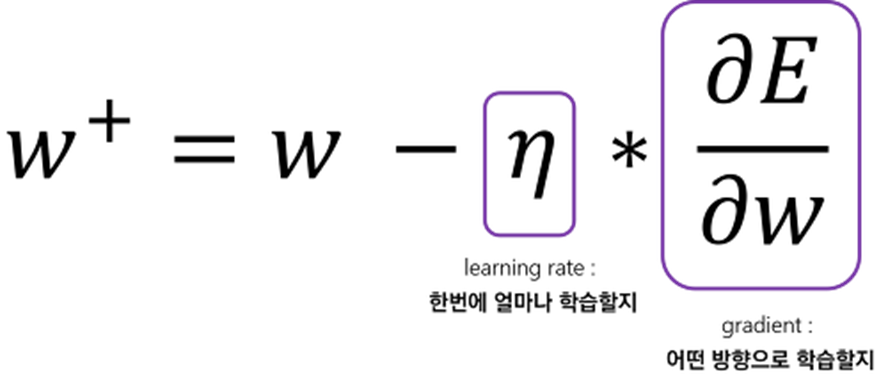

In [ ]:
criterion = nn.MSELoss() # 손실 함수 설정. 실제값와 예측값 간의 오차를 측정하는 방법
optimizer = torch.optim.SGD(linear.parameters(), lr=0.01) # 최적화 방법 설정. 여기서는 스토캐스틱 경사하강법 이용.

learning rate 학습률이 너무 크면 최저점에 수렴하지 못하고, 너무 작으면 학습이 오래걸림과 함께 최저점에 도달하지 못한다.
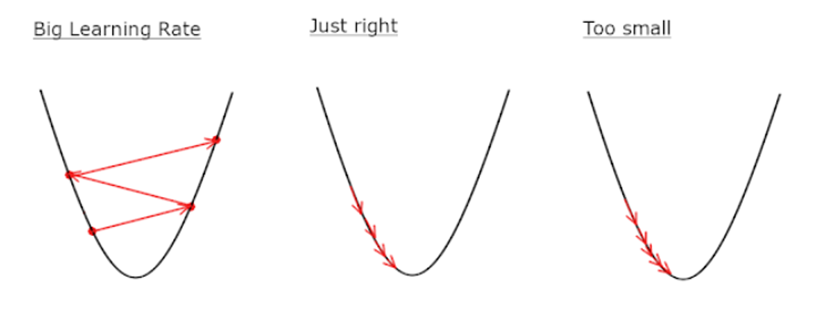

#### Forward pass

In [ ]:
pred = linear(x) # 만들어둔 linear 함수에 전방연산

In [ ]:
print(pred)

tensor([[-0.3257, -0.0466],
        [ 0.4130, -0.8032],
        [ 0.9341,  0.1096],
        [-1.4469, -0.7040],
        [-0.8789, -1.0210],
        [ 0.2723, -0.6001],
        [-0.0017, -0.8608],
        [-0.2695, -0.5391],
        [ 0.0628,  0.2260],
        [-0.5085, -0.5072]], grad_fn=<AddmmBackward>)


#### Compute loss.

In [ ]:
loss = criterion(pred, y) # criterion = mean square error
print('loss: ', loss.item())

loss:  1.803937315940857


In [ ]:
np.mean(np.square(pred.detach().numpy()-y.numpy()))

1.8039376

#### Backward pass.

In [ ]:
loss.backward()

#### Print out the weights and gradients.

In [ ]:
print ('w: ', linear.weight)
print ('b: ', linear.bias)

w:  Parameter containing:
tensor([[ 0.3952, -0.0431,  0.4130],
        [ 0.4008,  0.0951, -0.2499]], requires_grad=True)
b:  Parameter containing:
tensor([-0.1110, -0.3378], requires_grad=True)


In [ ]:
print ('dL/dw: ', linear.weight.grad) 
print ('dL/db: ', linear.bias.grad)

dL/dw:  tensor([[0.2563, 0.0767, 0.5661],
        [0.6573, 0.0198, 0.3018]])
dL/db:  tensor([ 0.2502, -0.1218])


#### 1-step gradient descent.

weight - learning_rate * gradient


In [ ]:
linear.weight - 0.01 * linear.weight.grad

tensor([[ 0.3927, -0.0439,  0.4073],
        [ 0.3943,  0.0949, -0.2530]], grad_fn=<SubBackward0>)

In [ ]:
optimizer.step()

In [ ]:
print ('w: ', linear.weight)
print ('b: ', linear.bias)

w:  Parameter containing:
tensor([[ 0.3927, -0.0439,  0.4073],
        [ 0.3943,  0.0949, -0.2530]], requires_grad=True)
b:  Parameter containing:
tensor([-0.1136, -0.3366], requires_grad=True)


#### Print out the loss after 1-step gradient descent.

In [ ]:
pred = linear(x)
loss = criterion(pred, y)
print('loss after 1 step optimization: ', loss.item())

loss after 1 step optimization:  1.7940692901611328
